In [1]:
import pandas as pd

df = pd.read_csv("BostonHousing.csv")

# Show first 5 rows and all column names
print(df.head())
print("\nColumn names in this dataset:\n", df.columns)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Column names in this dataset:
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')



Model Coefficient (Slope): nan
Model Intercept: nan
R² Score: nan
Mean Squared Error: nan


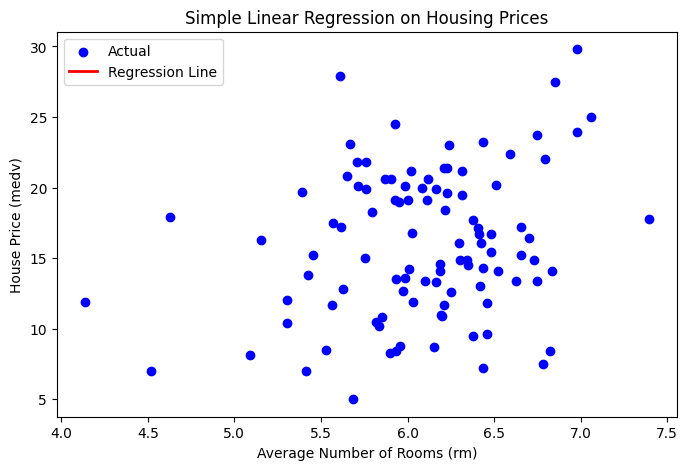

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("BostonHousing.csv")

# Step 3: Feature Selection (use rm → rooms, medv → house price)
X = df['rm'].values
y = df['medv'].values

# Step 4: Train-Test Split (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Calculate slope (m) and intercept (c) using least squares
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

numerator = np.sum((X_train - x_mean) * (y_train - y_mean))
denominator = np.sum((X_train - x_mean) ** 2)
m = numerator / denominator
c = y_mean - m * x_mean
print("\nModel Coefficient (Slope):", m)
print("Model Intercept:", c)

# Step 6: Predictions
y_pred = m * X_test + c

# Step 7: Evaluation metrics
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)
mse = np.mean((y_test - y_pred) ** 2)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

# Step 8: Visualization
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("House Price (medv)")
plt.title("Simple Linear Regression on Housing Prices")
plt.legend()
plt.show()

Logistic Regression Accuracy: 0.7886178861788617
Random Forest Accuracy: 0.7560975609756098

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



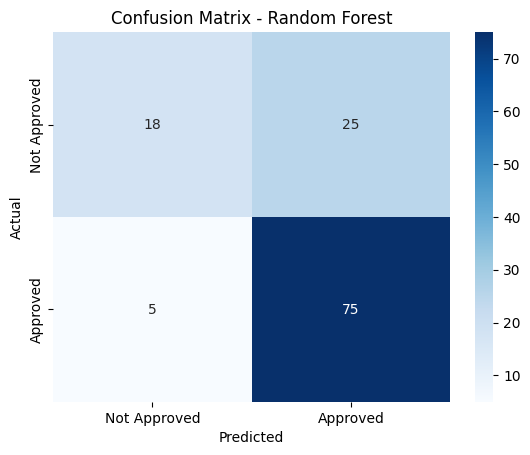

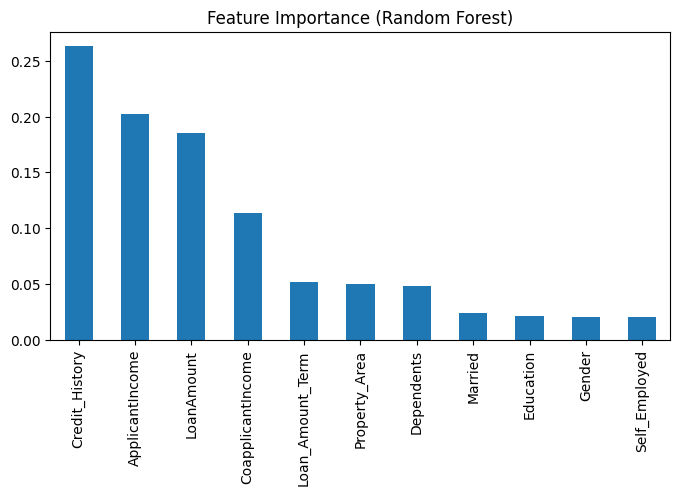


 Sample Predictions:
   ApplicantIncome  LoanAmount Predicted Status Actual Status
0             9083       228.0         Approved      Approved
1             4310       130.0         Approved      Approved
2             4167       158.0         Approved      Approved
3             2900        71.0     Not Approved      Approved
4             2718        70.0         Approved      Approved
5             1782       107.0         Approved      Approved
6             3717       120.0         Approved      Approved
7             3000        66.0         Approved      Approved
8             2647       173.0         Approved  Not Approved
9             1000       110.0         Approved  Not Approved


In [7]:
# Loan Eligibility Prediction 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Dataset
df = pd.read_csv("Loan_Data.csv")
# Drop Loan_ID 
df = df.drop("Loan_ID", axis=1)

# 2. Handle Missing Values 
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
        
# 3. Categorical Variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_enc.fit_transform(df[col])

# 4. Split Features & Target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 5. Scale Features (Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Models
# Logistic Regression
lr = LogisticRegression(max_iter=2000, solver="lbfgs")
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # no scaling needed
y_pred_rf = rf.predict(X_test)

# 7. Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Approved", "Approved"],
            yticklabels=["Not Approved", "Approved"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Random Forest)
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind="bar", figsize=(8,4), title="Feature Importance (Random Forest)")
plt.show()

# 8. Save Model
joblib.dump(rf, "loan_eligibility_model.pkl")

# 9. Predictions with Status
status_map = {1: "Approved", 0: "Not Approved"}
predicted_status = [status_map[val] for val in y_pred_rf]
actual_status = [status_map[val] for val in y_test]

# Show first 10 predictions
results_df = pd.DataFrame({
    "ApplicantIncome": X_test["ApplicantIncome"].values[:10],
    "LoanAmount": X_test["LoanAmount"].values[:10],
    "Predicted Status": predicted_status[:10],
    "Actual Status": actual_status[:10]
})
print("\n Sample Predictions:")
print(results_df)